# IMPORT THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# IMPORT THE DATA

In [2]:
df=pd.read_csv(r"C:\Users\Password\Desktop\RealLife Projects\DATA\ML Classification Package\3. Logisitic Regression\Train_Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploration and Data visualisation

In [3]:
print(len(df[df.Survived==1]),len(df[df.Survived==0]))

342 549


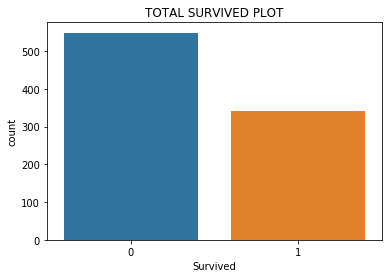

In [4]:
plt.title("TOTAL SURVIVED PLOT")
sns.countplot(x='Survived',data=df)
plt.show()

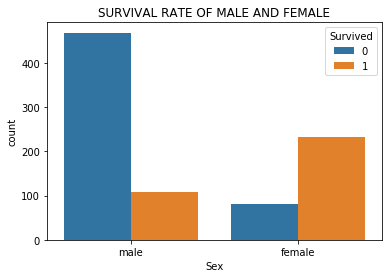

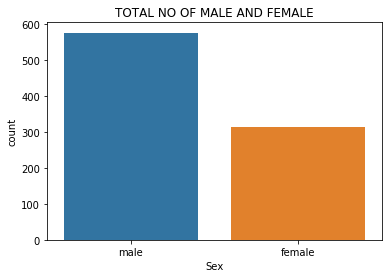

In [5]:
plt.title('SURVIVAL RATE OF MALE AND FEMALE')
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()
plt.title('TOTAL NO OF MALE AND FEMALE')
sns.countplot(x='Sex',data=df)
plt.show()

#### FROM GRAPH-> FEMALE ARE MORE SURVIVED THAN MALE

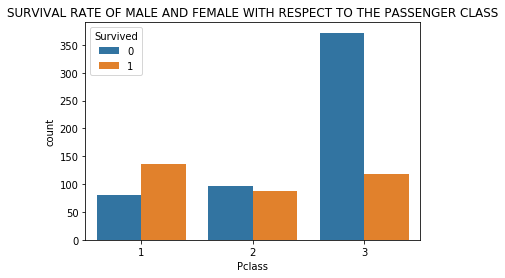

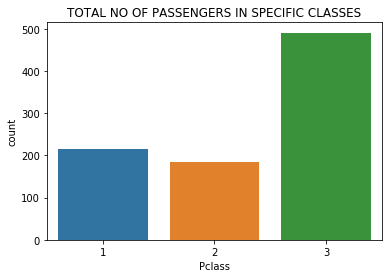

In [6]:
plt.title('SURVIVAL RATE OF MALE AND FEMALE WITH RESPECT TO THE PASSENGER CLASS')
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()
plt.title('TOTAL NO OF PASSENGERS IN SPECIFIC CLASSES')
sns.countplot(x='Pclass',data=df)
plt.show()

#### FROM GRAPH-> MORE PASSENGERS ARE DIED IN CLASS-3 
####                             THERE ARE MORE NO OF PASSENGERS IN CLASS-3 MAY BE DUE TO LOW FARE

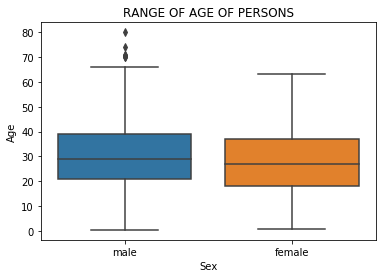

In [7]:
plt.title("RANGE OF AGE OF PERSONS")
sns.boxplot(y='Age',x='Sex',data=df)

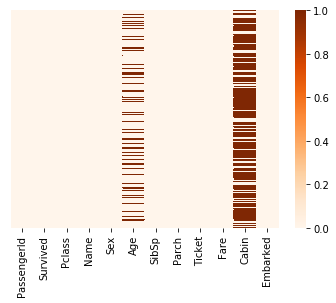

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='Oranges')
plt.show()

#### FROM GRAPH->1.THERE MORE NO OF MISSING VALUES IN CABIN SO WE WILL DROP THIS COLUMN
####                             2.A FEW ROWS OF AGE COLUMN HAVE MISSING VALUES

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

FROM THIS THERE ARE 177 MISSING VALUES IN THE "AGE" COLUMN AND 687 MISSING VALUES IN THE "CABIN"COLUMN AND 2 IN "Embarked"
NOW WE WILL FILL THE MEAN AGE OF MALE IN THE MALE MISSING VALUES OF AGE AND SAME FOR THE FEMALE

In [10]:
male_mean=df.loc[df['Sex']=='male','Age'].mean()
female_mean=df.loc[df['Sex']=='female','Age'].mean()

In [11]:
x=df.loc[df['Sex']=='male','Age'].fillna(value=int(male_mean))
y=df.loc[df['Sex']=='female','Age'].fillna(value=int(male_mean))


In [12]:
df['Age']=pd.concat([x,y])

In [13]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q


In [14]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

In [15]:
features=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
target=df.Survived
features.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## DIVIDING INTO TRAINING AND TESTING SET , PLOTTING CONFUSION MATRIX,CLASSIFICATION REPORT

In [28]:
def efficiency(model,features,target):
    from sklearn.model_selection import train_test_split,cross_val_score
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)
    model.fit(x_train,y_train)
    y_predicted=model.predict(x_test)
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y_test,y_predicted)
    sns.heatmap(cm,annot=True,cmap='viridis',fmt='d')
    print(classification_report(y_test,y_predicted))
    print(cross_val_score(model,features,target))
    print(roc_auc_score(y_test,y_predicted))
    

# MODEL FITTING 

# 1.LOGISTIC REGRESSION

C:\Users\Password\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

   micro avg       1.00      1.00      1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

[1. 1. 1.]
1.0


C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


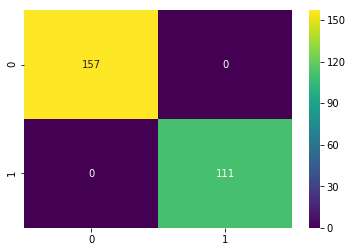

In [29]:
from sklearn.linear_model import LogisticRegression
efficiency(LogisticRegression(),features,target)

# 2.SUPPORT VECTOR MACHINES

C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.91      0.83       157
           1       0.83      0.60      0.70       111

   micro avg       0.78      0.78      0.78       268
   macro avg       0.80      0.76      0.76       268
weighted avg       0.79      0.78      0.78       268



C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default va

[0.79124579 0.79124579 0.82154882]
0.7572158145406553


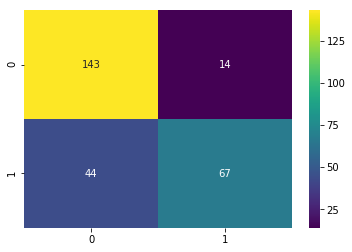

In [30]:
from sklearn.svm import SVC
efficiency(SVC(),features,target)

# (A).IMPROVING THE MODEL BY NORMALISATION

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)
min_train=x_train.min()
range_train=(x_train-min_train).max()
x_train_scaled=(x_train-min_train)/range_train

In [32]:
min_test=x_test.min()
range_test=(x_test-min_test).max()
x_test_scaled=(x_test-min_test)/range_test

C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        62

   micro avg       1.00      1.00      1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187

[1. 1. 1.]
1.0


C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default va

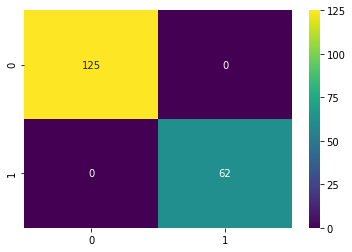

In [33]:
efficiency(SVC(),x_train_scaled,y_train)

# (B).IMPROVING THE MODEL BY GRIDSEARCHCV

C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gam

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00        62

   micro avg       1.00      1.00      1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ..........

C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6258992805755396, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .............. C=1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .............. C=1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .............. C=1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf .................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6258992805755396, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6258992805755396, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished
C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6285714285714286, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6304347826086957, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ..............................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished


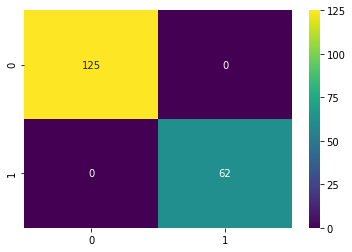

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
efficiency(grid,x_train_scaled,y_train)
print(grid.best_estimator_)
print(grid.best_score_)

# 3.K-NEAREST NEIGHBORS

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       157
           1       0.72      0.58      0.64       111

   micro avg       0.73      0.73      0.73       268
   macro avg       0.73      0.71      0.71       268
weighted avg       0.73      0.73      0.73       268

[0.72390572 0.75420875 0.75757576]
0.7086704538933839


C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


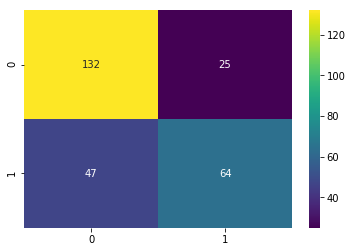

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=3)
efficiency(model,features,target)

# DECISION TREE CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

   micro avg       1.00      1.00      1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

[1. 1. 1.]
1.0


C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


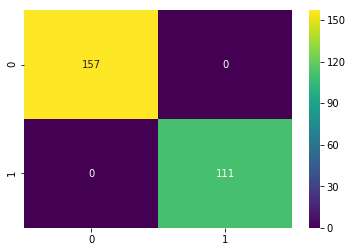

In [36]:
from sklearn.tree import DecisionTreeClassifier
efficiency(DecisionTreeClassifier(),features,target)

# RANDOM FOREST CLASSIFER

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

   micro avg       1.00      1.00      1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



C:\Users\Password\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1. 1. 1.]
1.0


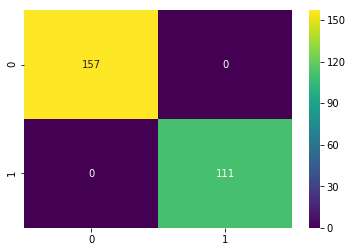

In [37]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,criterion='entropy')
efficiency(model,features,target)

# NAIVE BAYES

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [39]:
from sklearn.metrics import roc_auc_score